In [153]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from sklearn import datasets

In [154]:
mnist = datasets.fetch_openml('mnist_784', version=1)
mnistX, mnistY = mnist.data.to_numpy(), mnist.target.astype('float32')

Tree node definition

In [155]:
class Node:
    def __init__(self, center, parent_node, children_nodes, lv, ps, label):
        self.centerpoint = center
        self.parent = parent_node
        self.children = children_nodes
        self.level = lv
        self.radius = 2 ** lv
        self.pointset = ps
        self.label = label


Tree metrics algorithm

In [156]:
class Tree:
    def __init__(self, datax, datay):
        self.datasetx = datax
        self.datasety = datay
        self.distances = None
        self.root = None
        self.delta = 0
        self.r0 = np.random.uniform(0.5, 1)
        self.nodecounter = 0
        self.levels = {}
        # mapping data point number to node containing only this data point
        self.numtonode = {}

        # mapping data to unique number (its index in dataset)
        self.datatonum = {}
        for i in range(self.datasetx.shape[0]):
            self.datatonum[str(self.datasetx[i])] = i
            
def printwy(s, datay):
    res = "{"
    for i in s:
        res += f"({i}, {datay[i]})"
    res += "}"
    return res
    
def printtree(tree, datay):
    for i in range(tree.delta, 1, -1):
        layer = f"\nlayer {i}"
        for v in tree.levels[i]:
            layer += f"center: {v.centerpoint}, lab: {v.label}, pset: {printwy(v.pointset, datay)}| "
        print(layer)

In [157]:
def calculate_distances(xs):
    n = xs.shape[0]
    
    result = np.zeros((n,n))

    for i in range(n):
        for j in range(n):
            result[i][j] = scipy.spatial.distance.euclidean( xs[i], xs[j] )
    #print(result)

    #print(xs.shape)
    #result2 = xs.reshape(xs.shape[1],-1)
    #print(xs)
    #print(result2)

    minres = np.inf
    for i in range(n):
        for j in range(n):
            if i != j:
                minres = min(minres, result[i][j])
                
    return result, np.max(result), minres
    

# input: data, output: tree
def treemetrics(datax, datay):
    # random permutation of data
    indices = np.random.permutation(datax.shape[0])
    datax = datax[indices]
    datay = datay[indices]

    N = datax.shape[0]
    tree = Tree(datax, datay)

    # calculate distances
    tree.distances, maxdistance, mindistance = calculate_distances(datax)
    print(mindistance, maxdistance)

    while 2 ** tree.delta < 2 * maxdistance:
        tree.delta += 1

    allpoints = []
    for i in range(N):
        allpoints.append( i )
    #for x in allpoints:
    #    print(x, datax[x])

    
    tree.root = Node( 0, None, [], tree.delta, set(allpoints), tree.nodecounter)
    tree.nodecounter += 1
    tree.levels[tree.delta] = [tree.root]
    for i in range( tree.delta, 1, -1 ):
        tree.levels[i - 1] = []
        currentradius = (2 ** (i - 1)) * tree.r0
        
        for c in tree.levels[i]:
            S = c.pointset.copy()
            created_nodes = []
            for j in range(0, N):
                ball = set()
                for other in range(0, N):
                    if tree.distances[j][other] < currentradius:
                        ball.add(other)

                isection = ball.intersection(S).copy()
                if len(isection) > 0:
                    new_node = Node(j, c, [], i - 1, isection, tree.nodecounter)
                    tree.nodecounter += 1
                    tree.levels[i - 1].append(new_node)
                    S = S.difference(isection)
                    created_nodes.append( new_node )

            c.children = created_nodes

    for node in tree.levels[1]:
        elem = None
        for x in node.pointset:
            elem = x
        tree.numtonode[x] = node

    printtree(tree, datay)
    return tree

In [158]:
def treedistance(tree, a, b):
    #if str(a) not in tree.datatonum:
    #    raise error
    #if str(b) not in tree.datatonum:
    #    raise error

    #print(a)
    alabel = tree.datatonum[str(a)]
    blabel = tree.datatonum[str(b)]

    anode = tree.numtonode[alabel]
    bnode = tree.numtonode[blabel]

    distance = 0
    while anode.label != bnode.label:
        distance += 2 ** anode.level
        anode = anode.parent
        bnode = bnode.parent

    return distance * 2

In [159]:
print(mnistX.shape)
mytree = treemetrics(mnistX[:200], mnistY[:200])

(70000, 784)
419.583126448145 3668.5373107002742

layer 13center: 0, lab: 0, pset: {(0, 5.0)(1, 0.0)(2, 4.0)(3, 1.0)(4, 9.0)(5, 2.0)(6, 1.0)(7, 3.0)(8, 1.0)(9, 4.0)(10, 3.0)(11, 5.0)(12, 3.0)(13, 6.0)(14, 1.0)(15, 7.0)(16, 2.0)(17, 8.0)(18, 6.0)(19, 9.0)(20, 4.0)(21, 0.0)(22, 9.0)(23, 1.0)(24, 1.0)(25, 2.0)(26, 4.0)(27, 3.0)(28, 2.0)(29, 7.0)(30, 3.0)(31, 8.0)(32, 6.0)(33, 9.0)(34, 0.0)(35, 5.0)(36, 6.0)(37, 0.0)(38, 7.0)(39, 6.0)(40, 1.0)(41, 8.0)(42, 7.0)(43, 9.0)(44, 3.0)(45, 9.0)(46, 8.0)(47, 5.0)(48, 9.0)(49, 3.0)(50, 3.0)(51, 0.0)(52, 7.0)(53, 4.0)(54, 9.0)(55, 8.0)(56, 0.0)(57, 9.0)(58, 4.0)(59, 1.0)(60, 4.0)(61, 4.0)(62, 6.0)(63, 0.0)(64, 4.0)(65, 5.0)(66, 6.0)(67, 1.0)(68, 0.0)(69, 0.0)(70, 1.0)(71, 7.0)(72, 1.0)(73, 6.0)(74, 3.0)(75, 0.0)(76, 2.0)(77, 1.0)(78, 1.0)(79, 7.0)(80, 9.0)(81, 0.0)(82, 2.0)(83, 6.0)(84, 7.0)(85, 8.0)(86, 3.0)(87, 9.0)(88, 0.0)(89, 4.0)(90, 6.0)(91, 7.0)(92, 4.0)(93, 6.0)(94, 8.0)(95, 0.0)(96, 7.0)(97, 8.0)(98, 3.0)(99, 1.0)(100, 5.0)(101, 7.0)(102, 

In [160]:
sum_euclid_dists = np.zeros((10, 10))
sum_tree_dists = np.zeros((10, 10))
cnt_pair_dists = np.zeros((10, 10))

tree = mytree
for i in range(tree.datasetx.shape[0]):
    for j in range(tree.datasetx.shape[0]):
        if i != j:
            sum_euclid_dists[int(tree.datasety[i]), int(tree.datasety[j])] += tree.distances[i][j]
            sum_tree_dists[int(tree.datasety[i]), int(tree.datasety[j])] += treedistance(tree, tree.datasetx[i], tree.datasetx[j])
            cnt_pair_dists[int(tree.datasety[i]), int(tree.datasety[j])] += 1

average_euclid_dists = sum_euclid_dists / cnt_pair_dists
average_tree_dists = sum_tree_dists / cnt_pair_dists



In [161]:
print(average_euclid_dists)
print(average_tree_dists)
print(average_tree_dists / average_euclid_dists)

[[2488.71730271 2518.74805505 2548.94027187 2477.09521752 2534.32293097
  2472.14031616 2520.00931559 2477.45418428 2485.52699599 2540.0164071 ]
 [2518.74805505 2568.64176374 2580.78555261 2531.35696105 2583.59435584
  2550.47663292 2592.0181541  2519.83933687 2534.8213333  2588.59466262]
 [2548.94027187 2580.78555261 2596.63895445 2552.91515574 2606.43394148
  2546.23797836 2562.25827618 2522.15412064 2540.26144072 2597.01006002]
 [2477.09521752 2531.35696105 2552.91515574 2487.50153472 2537.67139279
  2483.53920392 2529.54399403 2469.78052898 2460.59349343 2535.73933544]
 [2534.32293097 2583.59435584 2606.43394148 2537.67139279 2618.11703919
  2543.72613528 2589.72046324 2536.74066781 2548.45001653 2603.16840024]
 [2472.14031616 2550.47663292 2546.23797836 2483.53920392 2543.72613528
  2546.91806268 2502.16332829 2485.14576501 2494.60785259 2560.67120541]
 [2520.00931559 2592.0181541  2562.25827618 2529.54399403 2589.72046324
  2502.16332829 2558.86250834 2513.38060137 2524.38117395 

testing on Iris dataset (2d)

In [162]:
iris = datasets.load_iris()

In [163]:
irisX = iris.data[:, 2:4] * 10
irisY = iris.target
#print(irisX)
#print(irisY)

In [164]:
iristree = treemetrics(irisX, irisY)

0.0 62.625873247404705

layer 7center: 0, lab: 0, pset: {(0, 1)(1, 0)(2, 1)(3, 2)(4, 0)(5, 2)(6, 2)(7, 2)(8, 2)(9, 0)(10, 2)(11, 0)(12, 1)(13, 0)(14, 0)(15, 2)(16, 1)(17, 1)(18, 1)(19, 2)(20, 0)(21, 2)(22, 1)(23, 1)(24, 1)(25, 0)(26, 2)(27, 2)(28, 2)(29, 0)(30, 2)(31, 0)(32, 0)(33, 0)(34, 1)(35, 2)(36, 2)(37, 1)(38, 2)(39, 0)(40, 1)(41, 2)(42, 1)(43, 0)(44, 0)(45, 1)(46, 0)(47, 1)(48, 0)(49, 0)(50, 2)(51, 0)(52, 2)(53, 2)(54, 1)(55, 1)(56, 1)(57, 0)(58, 0)(59, 0)(60, 1)(61, 1)(62, 0)(63, 2)(64, 0)(65, 1)(66, 1)(67, 1)(68, 0)(69, 1)(70, 0)(71, 0)(72, 2)(73, 0)(74, 1)(75, 2)(76, 1)(77, 2)(78, 0)(79, 2)(80, 1)(81, 1)(82, 2)(83, 1)(84, 0)(85, 2)(86, 1)(87, 1)(88, 2)(89, 2)(90, 2)(91, 1)(92, 2)(93, 1)(94, 1)(95, 0)(96, 0)(97, 2)(98, 2)(99, 0)(100, 1)(101, 0)(102, 0)(103, 0)(104, 2)(105, 0)(106, 1)(107, 1)(108, 2)(109, 0)(110, 0)(111, 1)(112, 2)(113, 2)(114, 0)(115, 0)(116, 2)(117, 1)(118, 2)(119, 0)(120, 2)(121, 2)(122, 1)(123, 1)(124, 0)(125, 1)(126, 0)(127, 2)(128, 0)(129, 0)(130, 2)(131,

In [165]:
for i in range(irisX.shape[0]):
    for j in range(irisX.shape[0]):
        if i != j and np.all(irisX[i] == irisX[j]):
            print(irisX[i])

[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[13.  2.]
[13.  2.]
[13.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  3.]
[14.  3.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[15.  1.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[14.  1.]
[12.  2.]
[15.  4.]
[15.  4.]
[14.  3.]
[14.  3.]
[15.  4.]
[15.  4.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[15.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[16.  2.]
[15.  4.]
[15.  4.]
[15.  1.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[14.  2.]
[15.  2.]


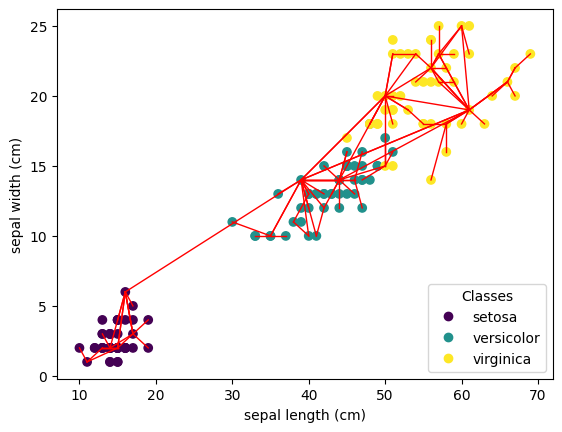

In [166]:
from matplotlib.lines import Line2D
lines = []
for i in range(iristree.delta, 0, -1):
    for v in iristree.levels[i]:
        if v.parent != None:
            lines.append((iristree.datasetx[v.centerpoint], iristree.datasetx[(v.parent).centerpoint]))

_, ax = plt.subplots()
scatter = ax.scatter(irisX[:, 0], irisX[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)
for a, b in lines:
    ax.add_line(Line2D([a[0], b[0]],
        [a[1], b[1]],
        linewidth=1, color='red'))
plt.show()

without duplicates:

In [167]:
new_array = [tuple(row) for row in irisX]
irisX = np.unique(new_array, axis=0)
print(irisX)

iristree = treemetrics(irisX, irisY)

[[10.  2.]
 [11.  1.]
 [12.  2.]
 [13.  2.]
 [13.  3.]
 [13.  4.]
 [14.  1.]
 [14.  2.]
 [14.  3.]
 [15.  1.]
 [15.  2.]
 [15.  3.]
 [15.  4.]
 [16.  2.]
 [16.  4.]
 [16.  6.]
 [17.  2.]
 [17.  3.]
 [17.  4.]
 [17.  5.]
 [19.  2.]
 [19.  4.]
 [30. 11.]
 [33. 10.]
 [35. 10.]
 [36. 13.]
 [37. 10.]
 [38. 11.]
 [39. 11.]
 [39. 12.]
 [39. 14.]
 [40. 10.]
 [40. 12.]
 [40. 13.]
 [41. 10.]
 [41. 13.]
 [42. 12.]
 [42. 13.]
 [42. 15.]
 [43. 13.]
 [44. 12.]
 [44. 13.]
 [44. 14.]
 [45. 13.]
 [45. 15.]
 [45. 16.]
 [45. 17.]
 [46. 13.]
 [46. 14.]
 [46. 15.]
 [47. 12.]
 [47. 14.]
 [47. 15.]
 [47. 16.]
 [48. 14.]
 [48. 18.]
 [49. 15.]
 [49. 18.]
 [49. 20.]
 [50. 15.]
 [50. 17.]
 [50. 19.]
 [50. 20.]
 [51. 15.]
 [51. 16.]
 [51. 18.]
 [51. 19.]
 [51. 20.]
 [51. 23.]
 [51. 24.]
 [52. 20.]
 [52. 23.]
 [53. 19.]
 [53. 23.]
 [54. 21.]
 [54. 23.]
 [55. 18.]
 [55. 21.]
 [56. 14.]
 [56. 18.]
 [56. 21.]
 [56. 22.]
 [56. 24.]
 [57. 21.]
 [57. 23.]
 [57. 25.]
 [58. 16.]
 [58. 18.]
 [58. 22.]
 [59. 21.]
 [59. 23.]

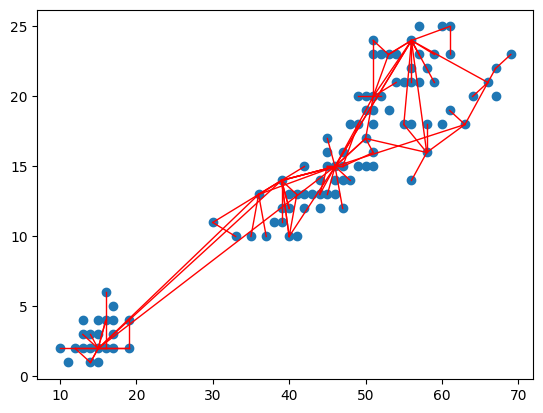

In [168]:
lines = []
for i in range(iristree.delta, 0, -1):
    for v in iristree.levels[i]:
        if v.parent != None:
            lines.append((iristree.datasetx[v.centerpoint], iristree.datasetx[(v.parent).centerpoint]))

_, ax = plt.subplots()
scatter = ax.scatter(irisX[:, 0], irisX[:, 1])
#ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
#_ = ax.legend(
#    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
#)
for a, b in lines:
    ax.add_line(Line2D([a[0], b[0]],
        [a[1], b[1]],
        linewidth=1, color='red'))
plt.show()